In [1]:
import numpy as np
import rutinas as ru
import matplotlib.pyplot as plt

from scipy.linalg import solve, norm, eig, eigh
from scipy.optimize import curve_fit, root_scalar
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp, quad


import plt_conf as conf 
conf.general()  # cargando configuración general

In [2]:
# para no tener q resetear el kernel cuando modifico el modulo
%load_ext autoreload
%autoreload 2

In [3]:
import multiprocessing as mul

## Autovalores de la energía

In [40]:
nodos=4
ell=3

en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)  # no escalada
    
Ext = 80#800#1000
Np = 50#800#1800
rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD, sD, dsD, uD, duD, Ext, Np)
print(' i')
rDnew2, sDnew2, dsDnew2, uDnew2, duDnew2 = ru.extend2(ell, rD, sD, dsD, uD, duD, Ext, Np)


Finding a profile with  4 nodes
Maxima precisión alcanzada 0.008919075459878516 radio 57.23422717448529
masa  -28.41923253295588 Uf  -0.4965426098323386

E(U(inf))  -0.026094377591340555
energía =  -0.1124388519535116 $\lambda = $ 0.24631168154330596

Checking normalización,  0.999999994629476 1
checking  -0.9266514053787811 28.41927738116341 1.5888655960868212 -0.1124388519535116
 i
checking  -0.9266514053787811 28.41927738116341 0.9626273450192349 -0.1124388519535116


/var/folders/wr/fks92kq54zdds0pdjqv4lswm0000gn/T/ipykernel_4571/2977450019.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),


(55.0, 70.0)

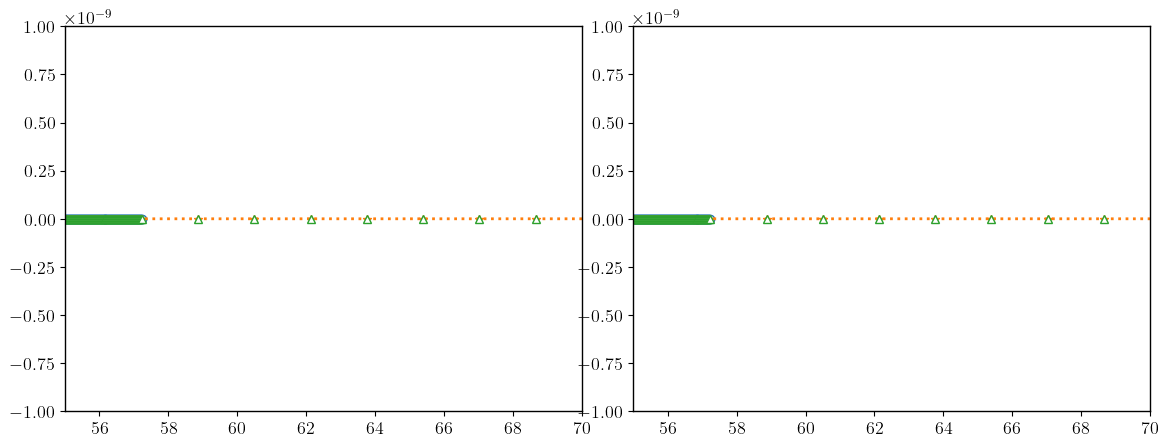

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.1) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(rD, sD, ls=':', marker='o', mfc='white')
ax[0].plot(rDnew, sDnew, ls=':', marker='*', mfc='white')
ax[0].plot(rDnew2, sDnew2, ls=' ', marker='^', mfc='white')

ax[0].set_ylim(-1e-09, 1e-09)
ax[0].set_xlim(55, 70)

ax[1].plot(rD, dsD, ls=':', marker='o', mfc='white')
ax[1].plot(rDnew, dsDnew, ls=':', marker='*', mfc='white')
ax[1].plot(rDnew2, dsDnew2, ls=' ', marker='^', mfc='white')

#plt.yscale('log')
ax[1].set_ylim(-1e-09, 1e-09)
ax[1].set_xlim(55, 70)

/var/folders/wr/fks92kq54zdds0pdjqv4lswm0000gn/T/ipykernel_4571/4048273892.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),


(55.0, 70.0)

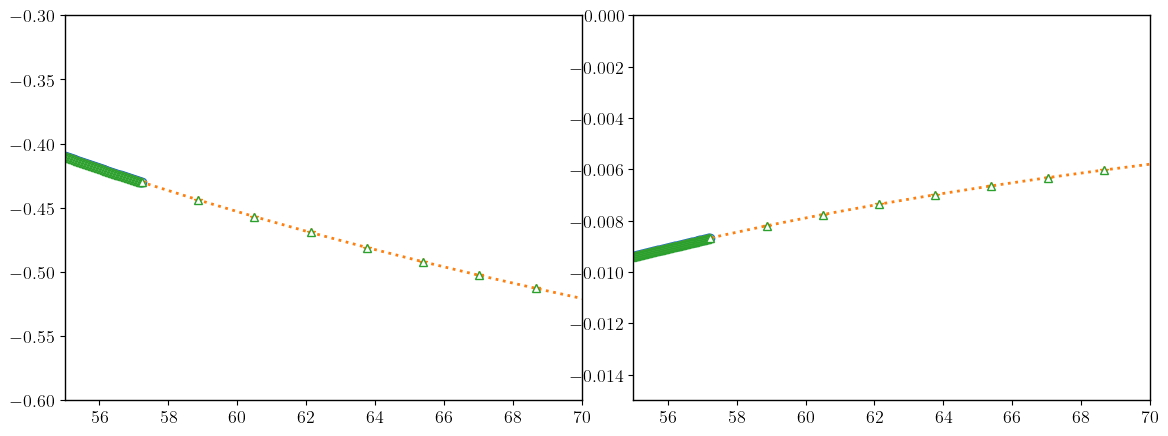

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.1) # espacio vertical y horizontal entre los subplots
                      ) 

ax[0].plot(rD, uD, ls=':', marker='o', mfc='white')
ax[0].plot(rDnew, uDnew, ls=':', marker='*', mfc='white')
ax[0].plot(rDnew2, uDnew2, ls=' ', marker='^', mfc='white')

ax[0].set_ylim(-0.6, -0.3)
ax[0].set_xlim(55, 70)

ax[1].plot(rD, duD, ls=':', marker='o', mfc='white')
ax[1].plot(rDnew, duDnew, ls=':', marker='*', mfc='white')
ax[1].plot(rDnew2, duDnew2, ls=' ', marker='^', mfc='white')

#plt.yscale('log')
ax[1].set_ylim(-0.015, 0)
ax[1].set_xlim(55, 70)

In [ ]:
# checking cuanto varia E con ambas extensiones

In [4]:
%%time
# graficando los niveles de energía y normalizando a 4pi

#dat = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], 
#       [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1]]

dat =[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], 
       [3, 0], [3, 1], [3, 2], [3, 3]]

#dat = [[6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [6, 9], [6, 10],
#       [6, 11], [6, 12], [6, 13], [6, 14], [6, 15], [6, 16], [6, 17], [6, 18], [6, 19], [6, 20], 
#       [6, 21], [6, 22], [6, 23], [6, 24], [6, 25], [6, 26], [6, 27], [6, 28], [6, 29], [6, 30]
#      ] 
       
dat = [[1, 0], [4, 0], [0, 0]]

Ext = 80#800#1000
Np = 50#800#1800
datNod = []
datSig = []
datU = []
datdU = []
datcer = []
datEnd = []
for i in dat:
    ell, nodos = i
    # (nodos, ell)
    en, lam, nv, rD, sD, dsD, uD, duD, cer0, ell = ru.profiles(nodos, ell)  # no escalada
    
    # extendiendo soluciones
    rDnew, sDnew, dsDnew, uDnew, duDnew = ru.extend(ell, rD, sD, dsD, uD, duD, Ext, Np)
    
    datEnd.append([ell, nodos, en, lam])  # [ell, nodos, en]
    datNod.append([nodos, lam])
    datSig.append([rDnew, sDnew])
    datU.append([rDnew, uDnew])
    datdU.append([rDnew, duDnew])
    datcer.append([ell, list(np.zeros(len(cer0))), cer0])

Finding a profile with  0 nodes
Maxima precisión alcanzada 0.4532695662510947 radio 23.03353372149293
masa  -7.285660238911255 Uf  -0.3163066651867185

E(U(inf))  -0.18985158137626534
energía =  -0.48696445532279475 $\lambda = $ 0.4117677584578792

Checking normalización,  0.9999999997728053 1
checking  -1.4360269489401114 7.2856602742171175 1.1264227550927204 -0.48696445532279475
Finding a profile with  0 nodes
Maxima precisión alcanzada 0.0018467342091699646 radio 24.328870676273816
masa  -18.666069892244714 Uf  -0.7672394720092116

E(U(inf))  -0.2639731532854084
energía =  -0.8846767132024504 $\lambda = $ 0.4821580749949362

Checking normalización,  1.0000000013381363 1
checking  -1.9027236267362175 18.666077510149595 -0.0005189342201545875 -0.8846767132024504
Finding a profile with  0 nodes
Maxima precisión alcanzada 1.0886370791814817 radio 22.97399087827363
masa  -3.618701252391218 Uf  -0.15751295765566803

E(U(inf))  -0.06935612141541053
energía =  -0.16276920743826248 $\lambda 

In [5]:
datEnd = np.array(datEnd)
datSig = np.array(datSig)
datcer = np.array(datcer)
datNod = np.array(datNod)
datU = np.array(datU)
datdU = np.array(datdU)

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_25377/110506420.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  datcer = np.array(datcer)


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_15008/1653957062.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(r1/l1/3, r1**1*s1*l1**2*3**(3/2), 'k-')


(0.0, 50.0)

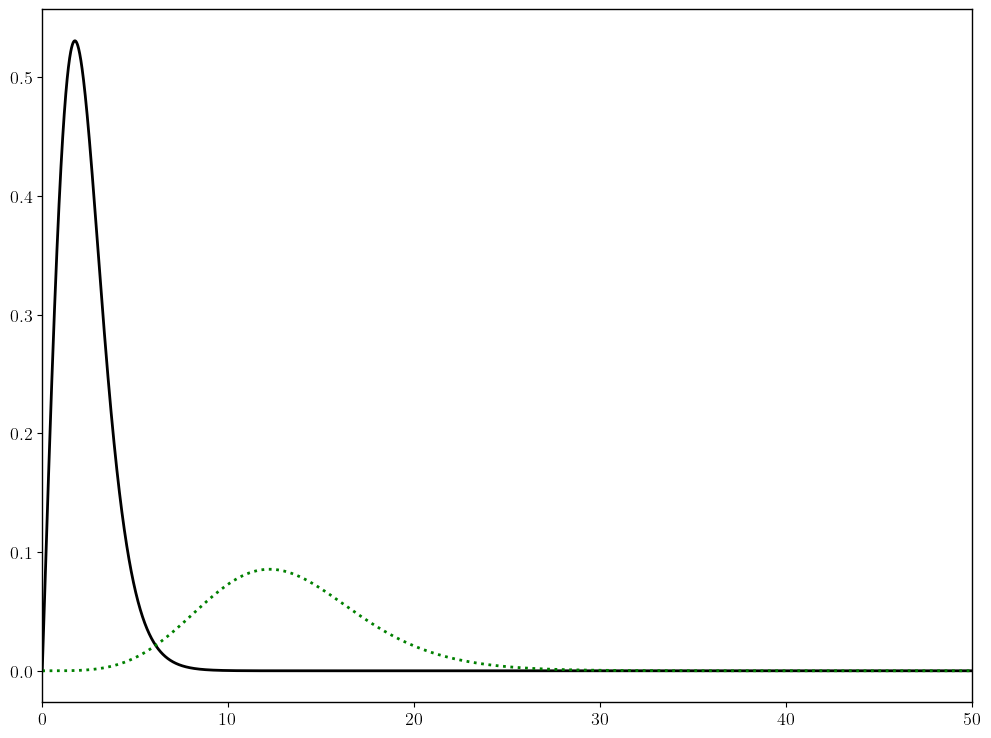

In [39]:
l1, l4 = datEnd[0][-1], datEnd[1][-1]

r1, s1 = datSig[0]
r4, s4 = datSig[1]

#(r/Lam, sDF*Lam**2,
plt.plot(r1/l1/3, r1**1*s1*l1**2*3**(3/2), 'k-')
plt.plot(r4/l4/1, r4**4*s4*l4**2, 'g:')
plt.xlim(0, 50)

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_15008/1826357649.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(r1/l1, (e1-(2*u1*l1**2))*3**2, 'k-')


(0.0, 100.0)

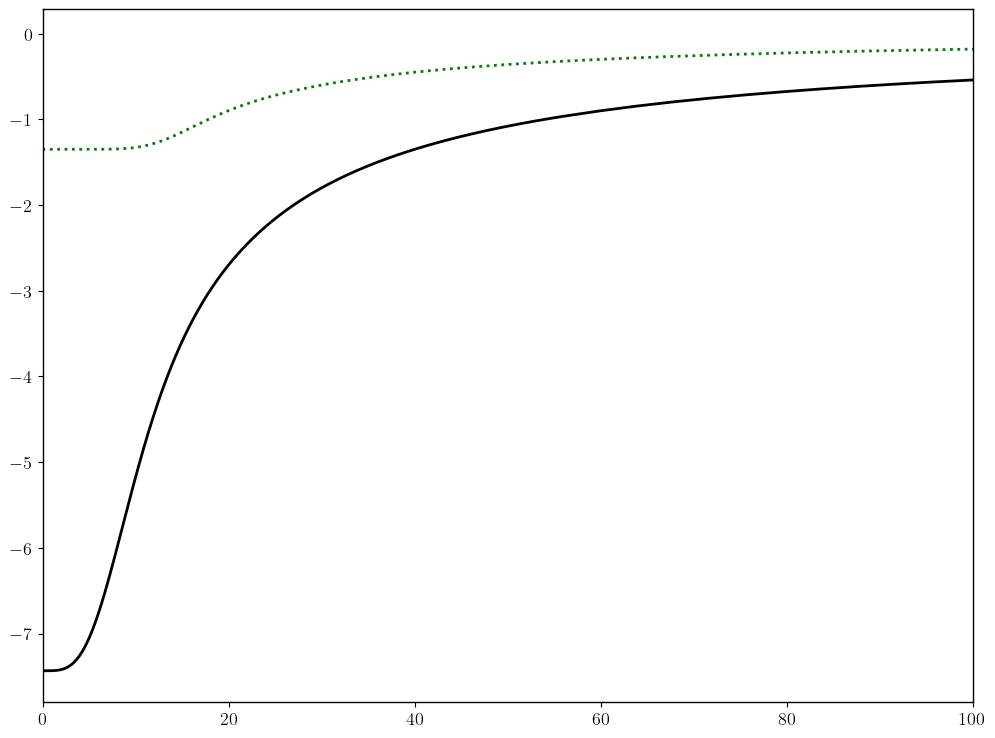

In [40]:
l1, l4 = datEnd[0][-1], datEnd[1][-1]
e1, e4 = datEnd[0][-2], datEnd[1][-2]

r1, u1 = datU[0]
r4, u4 = datU[1]

#r/Lam, E-(2*u)*Lam**2
plt.plot(r1/l1, (e1-(2*u1*l1**2))*3**2, 'k-')
plt.plot(r4/l4, e4-(2*u4*l4**2), 'g:')
plt.xlim(0, 100)

In [44]:
l1, l4, l0 = datEnd[0][-1], datEnd[1][-1], datEnd[2][-1]

ell1, ell4, ell0 = 1, 4, 0

r1, s1 = datSig[0]
r4, s4 = datSig[1]
r0, s0 = datSig[2]

sDF1 = r1**ell1*s1
sDF4 = r4**ell4*s4
sDF0 = r0**ell0*s0


sigF1 = interp1d(r1/l1, sDF1*l1**2, kind='quadratic')
sigF4 = interp1d(r4/l4, sDF4*l4**2, kind='quadratic')
sigF0 = interp1d(r0/l0, sDF0*l0**2, kind='quadratic')

rho1 = lambda x: x**2*sigF1(x)**2/(2*ell1+1)
rho4 = lambda x: x**2*sigF4(x)**2/(2*ell4+1)
rho0 = lambda x: x**2*sigF0(x)**2/(2*ell0+1)


rdat1 = np.logspace(np.log10(r1[1]/l1), np.log10(r1[-1]/l1), 200) #np.linspace(r1[0]/l1, r1[-1]/l1, 300)
rdat4 = np.logspace(np.log10(r4[1]/l4), np.log10(r4[-1]/l4), 100)
rdat0 = np.linspace(r0[0]/l0, r0[-1]/l0, 500)

d1 = [quad(rho1, r1[0]/l1, i)[0] for i in rdat1]
d4 = [quad(rho4, r4[0]/l4, i)[0] for i in rdat4]
d0 = [quad(rho0, r0[0]/l0, i)[0] for i in rdat0]

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_25377/868046192.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(rdat1, sigF1(rdat1)**2,'o-')


(0.0, 80.0)

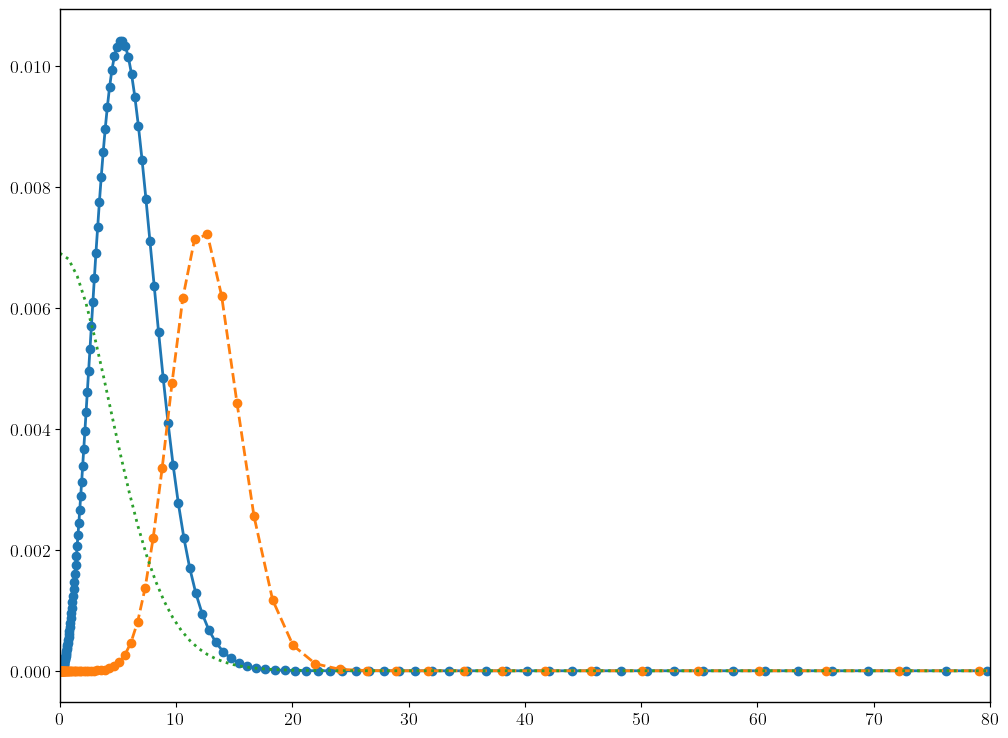

In [46]:
plt.plot(rdat1, sigF1(rdat1)**2,'o-')
plt.plot(rdat4[:-1], sigF4(rdat4[:-1])**2,'o--')
plt.plot(rdat0, sigF0(rdat0)**2, ':')

#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(1e-16, 5)
plt.xlim(0, 80)

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_25377/3444471321.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(rdat1, d1,'-')


(0.0, 100.0)

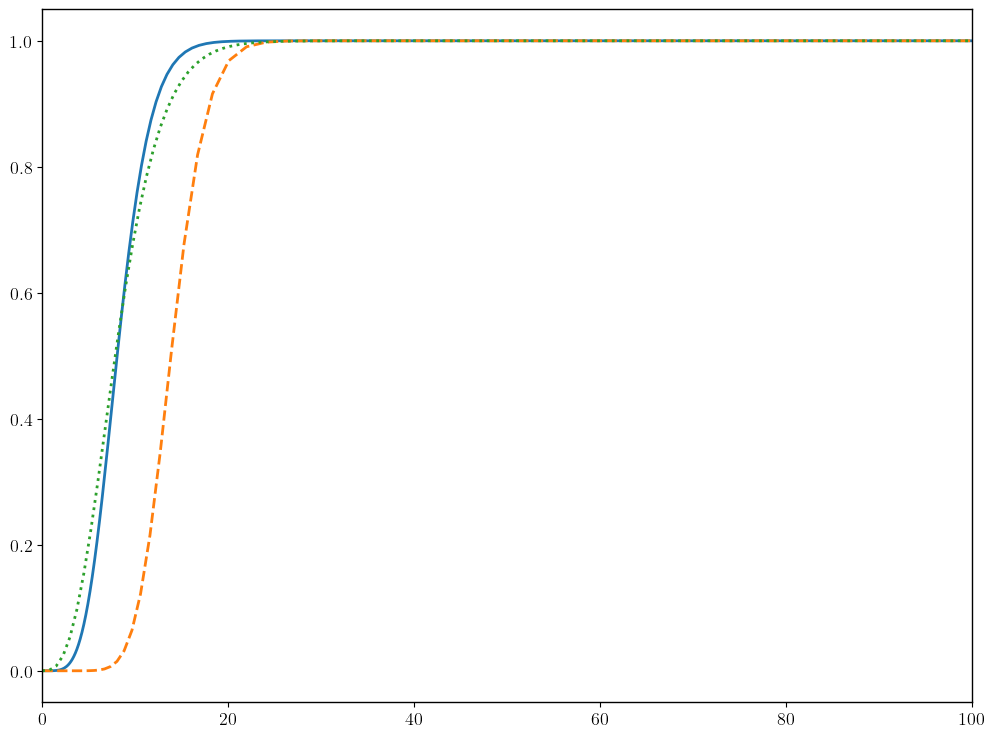

In [47]:
plt.plot(rdat1, d1,'-')
plt.plot(rdat4, d4,'--')
plt.plot(rdat0, d0, ':')

plt.xlim(0, 100)

In [6]:
#plt.plot(datSig[-1][0], datSig[-1][1])
#plt.plot(datU[-1][0]/datEnd[-1][-1], (-2*datU[-1][1])*datEnd[-1][-1]+datEnd[-1][-2])
## plt.plot(datdU[-1][0]/datEnd[-1][-1], -(4*datdU[-1][1])*datEnd[-1][-1]**3)

# (-2*u)*Lam**2+E

#plt.xscale('log')
#plt.yscale('log')

In [13]:
# name = 'datos E ell 6.dat'    
# np.savetxt(name, datEnd)

In [18]:
ell0, n0, e0, _ = np.loadtxt('datos E ell 0.dat', unpack=True)
ell1, n1, e1, _ = np.loadtxt('datos E ell 1.dat', unpack=True)
ell2, n2, e2, _ = np.loadtxt('datos E ell 2.dat', unpack=True)
ell3, n3, e3, _ = np.loadtxt('datos E ell 3.dat', unpack=True)
ell4, n4, e4, _ = np.loadtxt('datos E ell 4.dat', unpack=True)
ell5, n5, e5, _ = np.loadtxt('datos E ell 5.dat', unpack=True)
ell6, n6, e6, _ = np.loadtxt('datos E ell 6.dat', unpack=True)

[0.09525327 2.00003175 0.75690707]
[3.47576971e-07 9.70967013e-07 7.42384503e-06]

[0.86459004 2.00185536 1.32615316]
[1.94851197e-04 5.92731719e-05 4.73858520e-04]

[2.42343027 2.00375665 1.90635532]
[9.09186002e-04 9.75780970e-05 8.14320487e-04]

[4.78797017 2.00536668 2.4904085 ]
[0.00210335 0.00011306 0.00098317]

[7.96493046 2.00656105 3.0745874 ]
[0.00326813 0.00010456 0.00094571]

[11.95083272  2.00730196  3.65668509]
[3.52696848e-03 7.45056772e-05 6.99697698e-04]

[16.73168846  2.00757645  4.23517582]
[2.40616996e-03 3.59868770e-05 3.50332873e-04]



/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_26303/991242856.py:17: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_26303/991242856.py:4: RuntimeWarning: invalid value encountered in power
  return -A/((n+C)**B) #-A/(n+B)**G


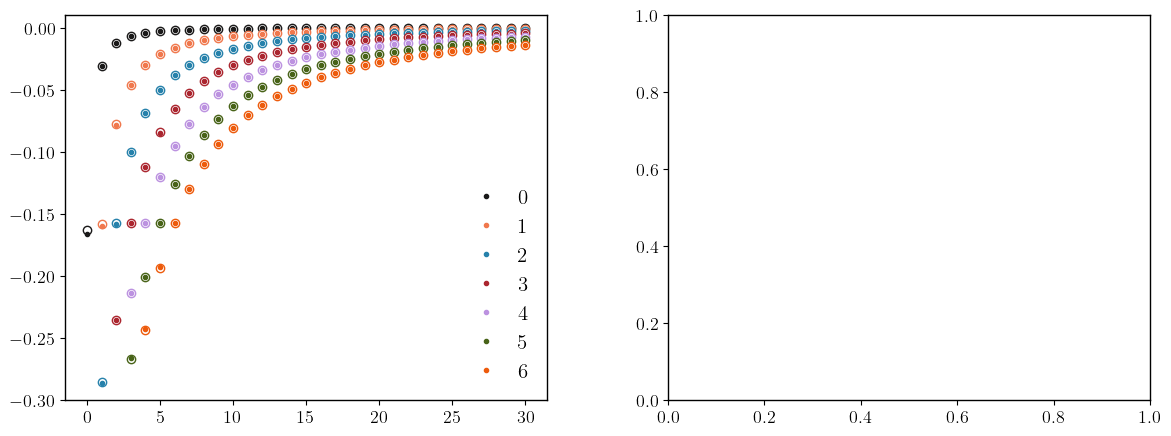

In [24]:
# ajustando modelo analítico de la energía

def En(n, A, B, C):
    return -A/((n+C)**B) #-A/(n+B)**G


def rect(n, lA, G):
    return lA-G*(n+1) # log(n+1)

# ajustando
datn = [n0, n1, n2, n3, n4, n5, n6]
date = [e0, e1, e2, e3, e4, e5, e6]

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.25) # espacio vertical y horizontal entre los subplots
                      ) 
j = 0
ll = [0, 1, 2, 3, 4, 5 ,6]
for i in range(len(datn)):
    xdata, ydata = datn[i], date[i]
    l = ll[i]
    val, error = curve_fit(En, xdata[10:], ydata[10:])
    val2, error2 = curve_fit(rect, np.log(1+xdata[5:]), np.log(np.abs(ydata[5:])))
    
    ax[0].plot(xdata, ydata, 'o', c=col[j], mfc='white')
    ax[0].plot(xdata, En(xdata, val[0], val[1], val[2]), '.', c=col[j], label=r'%d'%l)
    
    #ax[1].plot(xdata, -ydata, 'o', c=col[j])
    #ax[1].plot(xdata[10:], En(xdata[10:], -np.exp(val2[0]), val2[1]), '*', c=col[j])
    
    #ax[1].plot(np.log(1+xdata[5:]), np.log(np.abs(ydata[5:])), 'o', c=col[j], mfc='white' )
    #ax[1].plot(np.log(xdata[5:]), rect(np.log(xdata[5:]), val2[0], val2[1]), '*', c=col[j])
    
    
    print(val)
    print(np.sqrt(np.diag(error)))
    print('')
    j += 1

ax[0].set_ylim(-0.3, 0.01)
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')

#ax[1].set_xscale('log')
#ax[1].set_yscale('log')

#val, error, val2, error2
ax[0].legend(frameon=False)


/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_26303/4265301952.py:25: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),


[0.09779381 2.0115724  0.77625733]
[9.67615679e-05 7.11043013e-04 4.50699598e-04]

[0.84975411 1.99353053 1.32218752]
[0.00167636 0.00108204 0.001116  ]

[2.17372969 1.9632898  1.81161302]
[0.01844018 0.00400653 0.00571435]

[3.87692063 1.93322658 2.2639329 ]
[0.06375658 0.00702982 0.0127984 ]



Text(3.7, 6.4, '$\\triangle \\mathcal{E}^{phys}\\;[\\mu\\, v_c^2]$')

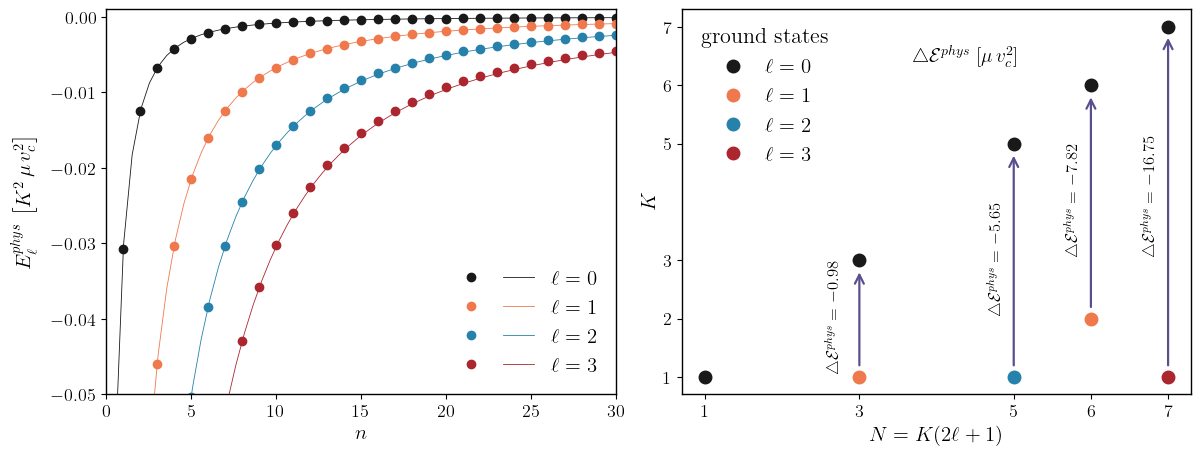

In [36]:
# ajustando modelo analítico de la energía

def En(n, A, B, C):
    return -A/((n+C)**B) #-A/(n+B)**G

def drawArrow(tram, A, B):
    tram.annotate('', (B[0], B[1]),
            xytext=(A[0], A[1]), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3",
                            linestyle='-', color='#58508d', lw=1.6))
    
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

datn = [n0, n1, n2, n3] #, n4, n5, n6]
date = [e0, e1, e2, e3] #, e4, e5, e6]
datell = [ell0[0], ell1[0], ell2[0], ell3[0], ell4[0], ell5[0], ell6[0]]

#eAnal = lambda n: -1/(2*(n+1)**2)
# eAnal = lambda n: -1/(2*(n)**2)
EH = lambda K, e, l : K*(2*l+1)/3*(K**2*e)

num = np.linspace(0, 30, 60)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.13) # espacio vertical y horizontal entre los subplots
                      ) 

for i in range(len(datn)):
    ax[0].plot(datn[i], date[i], marker='o', ls=' ', lw=0.5, #mfc='white', 
               c=col[i], label=r'$ $') #r'$\ell=%2d$'%datell[i])

# fit
for i in range(len(datn)):
    val, error = curve_fit(En, datn[i], date[i])
    errorP = np.sqrt(np.diag(error))
    # Err = En(xdata, val[0]+errorP[0], val[1]+errorP[1], val[2]+errorP[2])-En(xdata, val[0], val[1], val[2])
    
    # p1 = ax[0].errorbar(xdata+1, En(xdata, val[0], val[1], val[2]), yerr=Err, ls=' ', c=col[i],
    #               marker='*', label=r'')
    ax[0].plot(num, En(num, val[0], val[1], val[2]), ls='-', c=col[i], lw=0.6,
                   label=r'$\ell=%2d$'%datell[i])
    print(val)
    print(errorP)
    print()

# ax[0].plot(num, eAnal(num), ls='-',  lw=0.5, marker='s', label=r'Linear potential')    
    
#ax[0].set_xscale('log')
#ax.set_yscale('log')

ax[0].set_xlim(0, 30)
ax[0].set_ylim(-5e-02, 1e-3)
ax[0].legend(frameon=False, ncol=2, columnspacing=0
            ) #title=r'first-nodes with'

ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$E^{phys}_{\ell}\,\left[K^2 \,\mu\, v_c^2\right]$', labelpad=10)

####
#twin1 = ax[1].twinx()
#twin1.yaxis.tick_left()
#twin1.yaxis.set_label_position("left")  # label
#twin1.spines['left'].set_position(("axes", -0.02))
#twin1.spines['left'].set_linewidth(2)
#twin1.spines['left'].set_linestyle('--')
#twin1.spines['left'].set_color('#58508d')



N = np.array([1, 3, 5, 6, 7])
#K = np.copy(N)

#ax[1].plot(N, EH(K, -e0[0], 0), ls=' ', marker='o', #mfc='white',
#           markersize=9, c=col[0], label=r'$\ell=0$')

deltE = [0,
         -EH(1, e1[0], 1)+EH(3, e0[0], 0),
         -EH(1, e2[0], 2)+EH(5, e0[0], 0),
         -EH(2, e1[0], 1)+EH(6, e0[0], 0),
         -EH(1, e3[0], 3)+EH(7, e0[0], 0),
        ]

#twin1.plot(N, N, ls=' ', c='white')

#drawArrow(twin1, [3, 1.15], [3, 2.84])
#drawArrow(twin1, [5, 1.15], [5, 4.84])
#drawArrow(twin1, [7, 1.15], [7, 6.86])

#twin1.set_yticks(N)
#twin1.set_yticklabels(["$%3.2f$" % y for y in deltE]) # use LaTeX formatted labels
#twin1.set_ylabel(r'$\triangle \mathcal{E}^{phys}\;[\mu^5 G^2 \hbar^{-2}]$') #, labelpad=5


#K=1
#ax[1].plot([3], EH(K, -e1[0], 1), ls=' ', marker='o',# mfc='white',
#           markersize=9, c=col[1], label=r'$\ell=1$')
#ax[1].plot([5], EH(K, -e2[0], 1), ls=' ', marker='o',# mfc='white',
#           markersize=9, c=col[2], label=r'$\ell=2$')
#ax[1].plot([7], EH(K, -e3[0], 1), ls=' ', marker='o',# mfc='white',
#           markersize=9, c=col[3], label=r'$\ell=3$')

drawArrow(ax[1], [3, 1.15], [3, 2.84])
drawArrow(ax[1], [5, 1.15], [5, 4.84])
drawArrow(ax[1], [6, 2.15], [6, 5.84])
drawArrow(ax[1], [7, 1.15], [7, 6.86])

ax[1].plot(N, N, ls=' ', marker='o', #mfc='white',
           markersize=9, c=col[0], label=r'$\ell=0$')

ax[1].plot([3], [1], ls=' ', marker='o',# mfc='white',
           markersize=9, c=col[1], label=r'$\ell=1$')
ax[1].plot([6], [2], ls=' ', marker='o', #mfc='white',
           markersize=9, c=col[1])

ax[1].plot([5], [1], ls=' ', marker='o',# mfc='white',
           markersize=9, c=col[2], label=r'$\ell=2$')

ax[1].plot([7], [1], ls=' ', marker='o',# mfc='white',
           markersize=9, c=col[3], label=r'$\ell=3$')

ax[1].set_yticks([1, 2, 3, 5, 6, 7])
ax[1].set_xticks(N)
#ax[1].yaxis.set_label_position("right")

    
ax[1].legend(frameon=False, ncol=1, title=r'ground states', title_fontsize=16)
#ax[1].set_yscale('log')

ax[1].set_ylabel(r'$K$')
ax[1].set_xlabel(r'$N = K(2\ell+1)$')
#ax[1].yaxis.tick_right()

#ax[1].spines['left'].set_color('none')

ax[1].text(2.5, 1.1, r'$\triangle \mathcal{E}^{phys}=%3.2f$'%deltE[1], rotation=90, fontsize=12)
ax[1].text(4.6, 2.1, r'$\triangle \mathcal{E}^{phys}=%3.2f$'%deltE[2], rotation=90, fontsize=12)
ax[1].text(5.6, 3.1, r'$\triangle \mathcal{E}^{phys}=%3.2f$'%deltE[3], rotation=90, fontsize=12)
ax[1].text(6.6, 3.1, r'$\triangle \mathcal{E}^{phys}=%3.2f$'%deltE[4], rotation=90, fontsize=12)

#ax[1].text(3.7, 6.4, r'$\triangle \mathcal{E}^{phys}\;[\mu^5 G^2 \hbar^{-2}]$', fontsize=14)
ax[1].text(3.7, 6.4, r'$\triangle \mathcal{E}^{phys}\;[\mu\, v_c^2]$', fontsize=14)


In [37]:
fig.savefig('Energ_level.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

1
2


(0.0, 15.0)

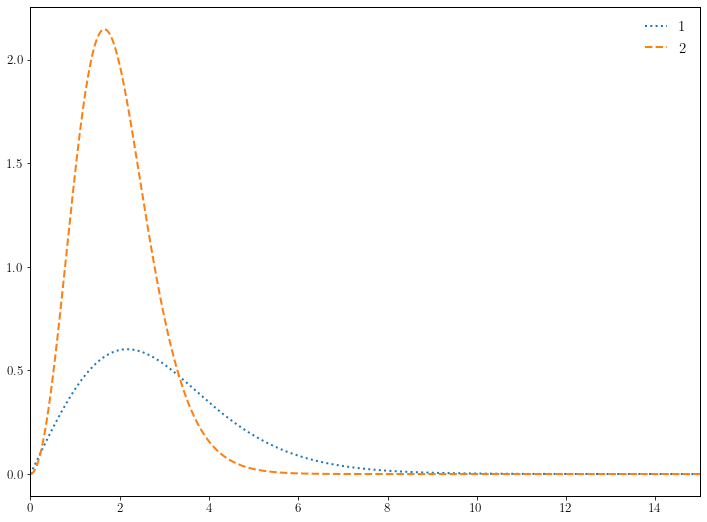

In [80]:
# test
i = 1
r, sig, ell, Lam = datSig[i][0], datSig[i][1], datcer[i][0], datNod[i][1]
print(ell)
s1 = sig[0]

plt.plot(r, r**ell*sig, ':', label=ell)  # 
i = 2
r, sig, ell, Lam = datSig[i][0], datSig[i][1], datcer[i][0], datNod[i][1]
s2 = sig[0]
c = s1/s2
print(ell)

plt.plot(r/np.sqrt(c), r**ell*(sig*c), '--', label=ell)

plt.legend(frameon=False)
plt.xlim(0,15)

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_12273/748526685.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),


1.0000000001931901
1.0000000004565577
1.0000000002231424
0.9999999935127459
1.0000010490017774
0.9999999974729397
1.0317938604502757
1.0000000177448491
1729.2401566033238
0.9999999859456585
$\ell=1$
0.9999999996994495
1.0000000026378006
1.0000000050070015
0.9999999809126668
1.0000000035696919
1.000000014541747
0.9999999735199865
2.122845761684662
155.58272735483175
42562.67598760061


Text(0.5, 0, '$r\\,[d_c/K]$')

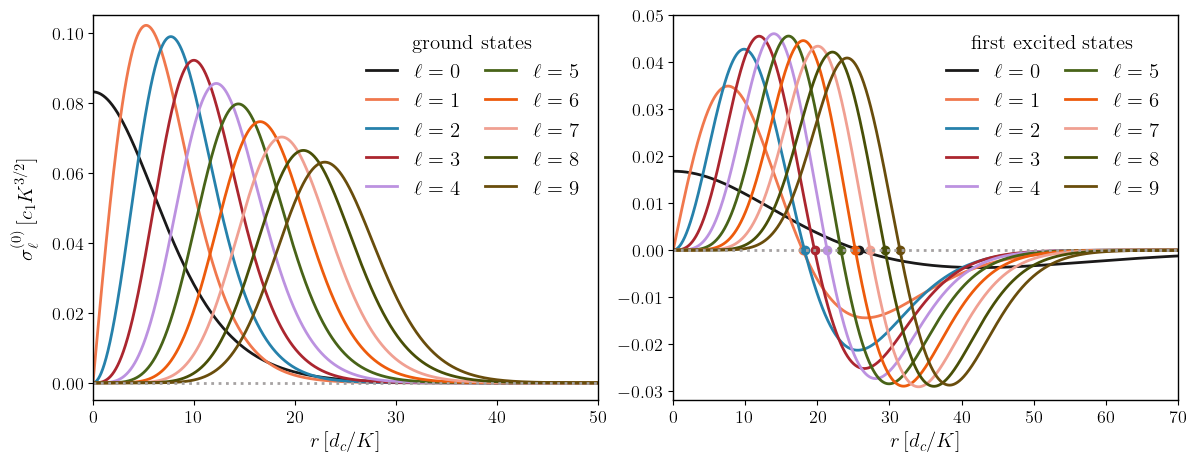

In [9]:
#col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.15) # espacio vertical y horizontal entre los subplots
                      ) 

for i in range(10):
    r, sig, ell, Lam = datSig[i][0], datSig[i][1], datcer[i][0], datNod[i][1]
    # checking
    sDF = r**ell*sig
    sigF = interp1d(r/Lam, sDF*Lam**2, kind='quadratic')
    Nf = lambda x: x**2*sigF(x)**2/(2*ell+1)
    Nv = quad(Nf, r[0]/Lam, r[-1]/Lam)[0]
    print(Nv)
    
    ax[0].plot(r/Lam, sDF*Lam**2, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)
    # ax[0].plot(r, sDF, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)


ax[0].set_xlim(-0.01, 50)
ax[0].set_ylim(-0.5e-02, 0.105)
ax[0].legend(frameon=False, title=r'ground states', ncol=2, columnspacing=1.2, title_fontsize=15)
ax[0].set_xlabel(r'$r\,[d_c/K]$')
ax[0].set_ylabel(r'$\sigma^{(0)}_{\ell}\,[c_1 K^{3/2}]$', labelpad=10)

print('$\ell=1$')

for i in range(10, 20):
    r, sig, ell, Lam = datSig[i][0], datSig[i][1], datcer[i][0], datNod[i][1]
    # checking
    sDF = r**ell*sig
    sigF = interp1d(r/Lam, sDF*Lam**2, kind='quadratic')
    Nf = lambda x: x**2*sigF(x)**2/(2*ell+1)
    Nv = quad(Nf, r[0]/Lam, r[-1]/Lam)[0]
    print(Nv)
    
    ax[1].plot(r/Lam, sDF*Lam**2, ls='-', c=col[i-10], label=r'$\ell=%2d$'%ell)
    ax[1].plot(datcer[i][2]/Lam, datcer[i][1], ls=' ', marker='o', c=col[i-10])
    # ax[1].plot(r, sDF, ls='-', c=col[i-10], label=r'$\ell=%2d$'%ell)
    # ax[1].plot(datcer[i][2], datcer[i][1], ls=' ', marker='o', c=col[i-10])


        
ax[1].set_xlim(0, 70)
ax[1].set_ylim(-0.32e-01, 0.05)
ax[1].legend(frameon=False, title=r'first excited states', ncol=2, columnspacing=1.2, title_fontsize=15)

ax[1].hlines(y=0, xmin=0, xmax=80, color='#a6a2a2', ls=':')
ax[0].hlines(y=0, xmin=0, xmax=80, color='#a6a2a2', ls=':')


ax[1].set_xlabel(r'$r\,[d_c/K]$')
#ax[1].set_ylabel(r'$E_n(n)$')

#ax[0].text(x=27, y=0.003, s=r'zero-nodes')
#ax[1].text(x=60, y=0.002, s=r'first-nodes')

0.9999999993196383
1.0000000002295433
1.0000079793108902
0.9999999921639013
$\ell=1$
1.0000000023048614
1.0000000032351852
1.000000005813643
0.9999999655703498


Text(0.5, 0, '$r\\,[c_4]$')

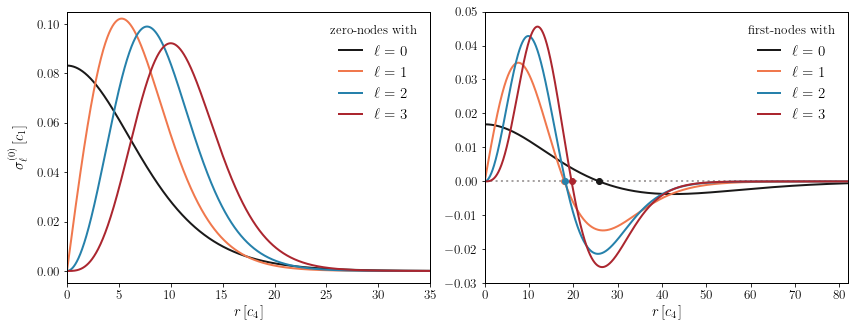

In [9]:
# datos
l0N0, l1N0, l2N0, l3N0 = datSig[0], datSig[4], datSig[8], datSig[12]
cl0N0, cl1N0, cl2N0, cl3N0 = datcer[0], datcer[4], datcer[8], datcer[12]
Lal0N0, Lal1N0, Lal2N0, Lal3N0 = datNod[0][1], datNod[4][1], datNod[8][1], datNod[12][1]
datN0 = [l0N0, l1N0, l2N0, l3N0]
datcN0 = [cl0N0, cl1N0, cl2N0, cl3N0]
datLaN0 = [Lal0N0, Lal1N0, Lal2N0, Lal3N0]

l0N2, l1N2, l2N2, l3N2 = datSig[1], datSig[5], datSig[9], datSig[13]
cl0N2, cl1N2, cl2N2, cl3N2 = datcer[1], datcer[5], datcer[9], datcer[13]
Lal0N2, Lal1N2, Lal2N2, Lal3N2 = datNod[1][1], datNod[5][1], datNod[9][1], datNod[13][1]
datN2 = [l0N2, l1N2, l2N2, l3N2]
datcN2 = [cl0N2, cl1N2, cl2N2, cl3N2]
datLaN2 = [Lal0N2, Lal1N2, Lal2N2, Lal3N2]

l0N3, l1N3, l2N3, l3N3 = datSig[2], datSig[6], datSig[10], datSig[14]
cl0N3, cl1N3, cl2N3, cl3N3 = datcer[2], datcer[6], datcer[10], datcer[14]
Lal0N3, Lal1N3, Lal2N3, Lal3N3 = datNod[2][1], datNod[6][1], datNod[10][1], datNod[14][1]
datN3 = [l0N3, l1N3, l2N3, l3N3]
datcN3 = [cl0N3, cl1N3, cl2N3, cl3N3]
datLaN3 = [Lal0N3, Lal1N3, Lal2N3, Lal3N3]




#col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']
col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f', '#bc92e0', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#91f20a']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.15) # espacio vertical y horizontal entre los subplots
                      ) 

for i in range(10):
    r, sig, ell, Lam = datN0[i][0], datN0[i][1], datcN0[i][0], datLaN0[i]
    # checking
    sDF = r**ell*sig
    sigF = interp1d(r/Lam, sDF*Lam**2, kind='quadratic')
    Nf = lambda x: x**2*sigF(x)**2/(2*ell+1)
    Nv = quad(Nf, r[0]/Lam, r[-1]/Lam)[0]
    print(Nv)
    
    ax[0].plot(r/Lam, sDF*Lam**2, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)

ax[0].set_xlim(-0.01, 35)
ax[0].set_ylim(-0.5e-02, 0.105)
ax[0].legend(frameon=False, title=r'first excited states')
ax[0].set_xlabel(r'$r\,[c_4]$')
ax[0].set_ylabel(r'$\sigma^{(0)}_{\ell}\,[c_1]$', labelpad=10)

print('$\ell=1$')

for i in range(10):
    r, sig, ell, Lam = datN2[i][0], datN2[i][1], datcN2[i][0], datLaN2[i]
    # checking
    sDF = r**ell*sig
    sigF = interp1d(r/Lam, sDF*Lam**2, kind='quadratic')
    Nf = lambda x: x**2*sigF(x)**2/(2*ell+1)
    Nv = quad(Nf, r[0]/Lam, r[-1]/Lam)[0]
    print(Nv)
    
    ax[1].plot(r/Lam, sDF*Lam**2, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)
    ax[1].plot(datcN2[i][2]/Lam, datcN2[i][1], ls=' ', marker='o', c=col[i])

ax[1].set_xlim(0, 82)
ax[1].set_ylim(-0.3e-01, 0.05)
ax[1].legend(frameon=False, title=r'first excited states')

ax[1].hlines(y=0, xmin=0, xmax=80, color='#a6a2a2', ls=':')

ax[1].set_xlabel(r'$r\,[c_4]$')
#ax[1].set_ylabel(r'$E_n(n)$')

#ax[0].text(x=27, y=0.003, s=r'zero-nodes')
#ax[1].text(x=60, y=0.002, s=r'first-nodes')

0.9999999993196383
1.0000000002295433
1.0000079793108902
0.9999999921639013
$\ell=1$
1.0000000023048614
1.0000000032351852
1.000000005813643
0.9999999655703498
$\ell=2$
0.999999995572931
0.999999997526393
0.9999999824893293
1.0000667653826736


Text(0.5, 0, '$r\\,[c_4]$')

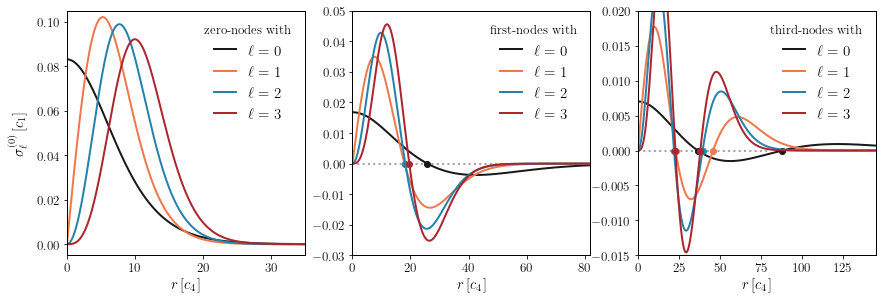

In [13]:
# datos
l0N0, l1N0, l2N0, l3N0 = datSig[0], datSig[4], datSig[8], datSig[12]
cl0N0, cl1N0, cl2N0, cl3N0 = datcer[0], datcer[4], datcer[8], datcer[12]
Lal0N0, Lal1N0, Lal2N0, Lal3N0 = datNod[0][1], datNod[4][1], datNod[8][1], datNod[12][1]
datN0 = [l0N0, l1N0, l2N0, l3N0]
datcN0 = [cl0N0, cl1N0, cl2N0, cl3N0]
datLaN0 = [Lal0N0, Lal1N0, Lal2N0, Lal3N0]

l0N2, l1N2, l2N2, l3N2 = datSig[1], datSig[5], datSig[9], datSig[13]
cl0N2, cl1N2, cl2N2, cl3N2 = datcer[1], datcer[5], datcer[9], datcer[13]
Lal0N2, Lal1N2, Lal2N2, Lal3N2 = datNod[1][1], datNod[5][1], datNod[9][1], datNod[13][1]
datN2 = [l0N2, l1N2, l2N2, l3N2]
datcN2 = [cl0N2, cl1N2, cl2N2, cl3N2]
datLaN2 = [Lal0N2, Lal1N2, Lal2N2, Lal3N2]

l0N3, l1N3, l2N3, l3N3 = datSig[2], datSig[6], datSig[10], datSig[14]
cl0N3, cl1N3, cl2N3, cl3N3 = datcer[2], datcer[6], datcer[10], datcer[14]
Lal0N3, Lal1N3, Lal2N3, Lal3N3 = datNod[2][1], datNod[6][1], datNod[10][1], datNod[14][1]
datN3 = [l0N3, l1N3, l2N3, l3N3]
datcN3 = [cl0N3, cl1N3, cl2N3, cl3N3]
datLaN3 = [Lal0N3, Lal1N3, Lal2N3, Lal3N3]

l0N4, l1N4, l2N4, l3N4 = datSig[3], datSig[7], datSig[11], datSig[15]
cl0N4, cl1N4, cl2N4, cl3N4 = datcer[3], datcer[7], datcer[11], datcer[15]
Lal0N4, Lal1N4, Lal2N4, Lal3N4 = datNod[3][1], datNod[7][1], datNod[11][1], datNod[15][1]
datN4 = [l0N4, l1N4, l2N4, l3N4]
datcN4 = [cl0N4, cl1N4, cl2N4, cl3N4]
datLaN4 = [Lal0N4, Lal1N4, Lal2N4, Lal3N4]


col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14.5, 4.5),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.2) # espacio vertical y horizontal entre los subplots
                      ) 

for i in range(4):
    r, sig, ell, Lam = datN0[i][0], datN0[i][1], datcN0[i][0], datLaN0[i]
    # checking
    sDF = r**ell*sig
    sigF = interp1d(r/Lam, sDF*Lam**2, kind='quadratic')
    Nf = lambda x: x**2*sigF(x)**2/(2*ell+1)
    Nv = quad(Nf, r[0]/Lam, r[-1]/Lam)[0]
    print(Nv)
    
    ax[0].plot(r/Lam, sDF*Lam**2, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)

ax[0].set_xlim(-0.01, 35)
ax[0].set_ylim(-0.5e-02, 0.105)
ax[0].legend(frameon=False, title=r'zero-nodes with')
ax[0].set_xlabel(r'$r\,[c_4]$')
ax[0].set_ylabel(r'$\sigma^{(0)}_{\ell}\,[c_1]$', labelpad=10)

print('$\ell=1$')

for i in range(4):
    r, sig, ell, Lam = datN2[i][0], datN2[i][1], datcN2[i][0], datLaN2[i]
    # checking
    sDF = r**ell*sig
    sigF = interp1d(r/Lam, sDF*Lam**2, kind='quadratic')
    Nf = lambda x: x**2*sigF(x)**2/(2*ell+1)
    Nv = quad(Nf, r[0]/Lam, r[-1]/Lam)[0]
    print(Nv)
    
    ax[1].plot(r/Lam, sDF*Lam**2, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)
    ax[1].plot(datcN2[i][2]/Lam, datcN2[i][1], ls=' ', marker='o', c=col[i])

ax[1].set_xlim(0, 82)
ax[1].set_ylim(-0.3e-01, 0.05)
ax[1].legend(frameon=False, title=r'first-nodes with')

ax[1].hlines(y=0, xmin=0, xmax=80, color='#a6a2a2', ls=':')

ax[1].set_xlabel(r'$r\,[c_4]$')
#ax[1].set_ylabel(r'$E_n(n)$')

#ax[0].text(x=27, y=0.003, s=r'zero-nodes')
#ax[1].text(x=60, y=0.002, s=r'first-nodes')

print('$\ell=2$')

for i in range(4):
    r, sig, ell, Lam = datN3[i][0], datN3[i][1], datcN3[i][0], datLaN3[i]
    # checking
    sDF = r**ell*sig
    sigF = interp1d(r/Lam, sDF*Lam**2, kind='quadratic')
    Nf = lambda x: x**2*sigF(x)**2/(2*ell+1)
    Nv = quad(Nf, r[0]/Lam, r[-1]/Lam)[0]
    print(Nv)
    
    ax[2].plot(r/Lam, sDF*Lam**2, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)
    ax[2].plot(datcN3[i][2]/Lam, datcN3[i][1], ls=' ', marker='o', c=col[i])

ax[2].set_xlim(0, 145)
ax[2].set_ylim(-0.15e-01, 0.02)
ax[2].legend(frameon=False, title=r'third-nodes with')

ax[2].hlines(y=0, xmin=0, xmax=80, color='#a6a2a2', ls=':')

ax[2].set_xlabel(r'$r\,[c_4]$')



In [13]:
fig.savefig('Wf.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

$\ell=1$


Text(0, 0.5, '$U_0^{\\prime} \\;[\\mu^8 G^3 \\hbar^{-4}]$')

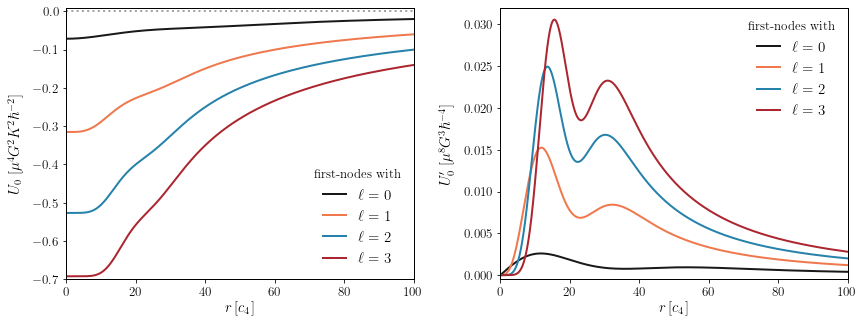

In [16]:
# datos
l0N2, l1N2, l2N2, l3N2 = datU[1], datU[5], datU[9], datU[13]
dl0N2, dl1N2, dl2N2, dl3N2 = datdU[1], datdU[5], datdU[9], datdU[13]
El0N2, El1N2, El2N2, El3N2 = datEnd[1], datEnd[5], datEnd[9], datEnd[13]
Lal0N2, Lal1N2, Lal2N2, Lal3N2 = datNod[1][1], datNod[5][1], datNod[9][1], datNod[13][1]
datN2 = [l0N2, l1N2, l2N2, l3N2]
datdN2 = [dl0N2, dl1N2, dl2N2, dl3N2]
datEN2 = [El0N2, El1N2, El2N2, El3N2]
datLaN2 = [Lal0N2, Lal1N2, Lal2N2, Lal3N2]

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.),
                       sharex=False, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.25) # espacio vertical y horizontal entre los subplots
                      ) 


for i in range(4):
    r, u, ell, E, Lam = datN2[i][0], datN2[i][1], datEN2[i][0], datEN2[i][2], datLaN2[i]
    
    ax[0].plot(r/Lam, E-(2*u)*Lam**2, ls='-', c=col[i], label=r'$\ell=%2d$'%ell) 
    # notar que ya multipliqué la energia antes por 2
    
ax[0].hlines(y=0, xmin=0, xmax=200, color='#a6a2a2', ls=':')

ax[0].set_xlim(0, 100)
ax[0].set_ylim(-0.7, 0.01)
ax[0].legend(frameon=False, title=r'first-nodes with')
ax[0].set_xlabel(r'$r\,[c_4]$')
ax[0].set_ylabel(r'$U_0 \;[\mu^4 G^2 K^2 \hbar^{-2}]$', labelpad=10)

print('$\ell=1$')

for i in range(4):
    r, du, ell, E, Lam = datdN2[i][0], datdN2[i][1], datEN2[i][0], datEN2[i][2], datLaN2[i]
    
    ax[1].plot(r/Lam, -(4*du)*Lam**3, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)
    
ax[1].set_xlim(0, 100)
ax[1].set_ylim(-0.5e-03, 0.032)
ax[1].legend(frameon=False, title=r'first-nodes with')
#ax[1].set_xscale('log')

ax[1].set_xlabel(r'$r\,[c_4]$')
ax[1].set_ylabel(r'$U_0^{\prime} \;[\mu^8 G^3 \hbar^{-4}]$', labelpad=10)

#ax[1].text(x=60, y=0.003, s=r'first-nodes')

/var/folders/ln/6d_fhnr91m5g_chrnswm6cyr0000gn/T/ipykernel_26303/2385771123.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7.5),


$\ell=1$


Text(0.5, 0, '$r\\,[d_c/K]$')

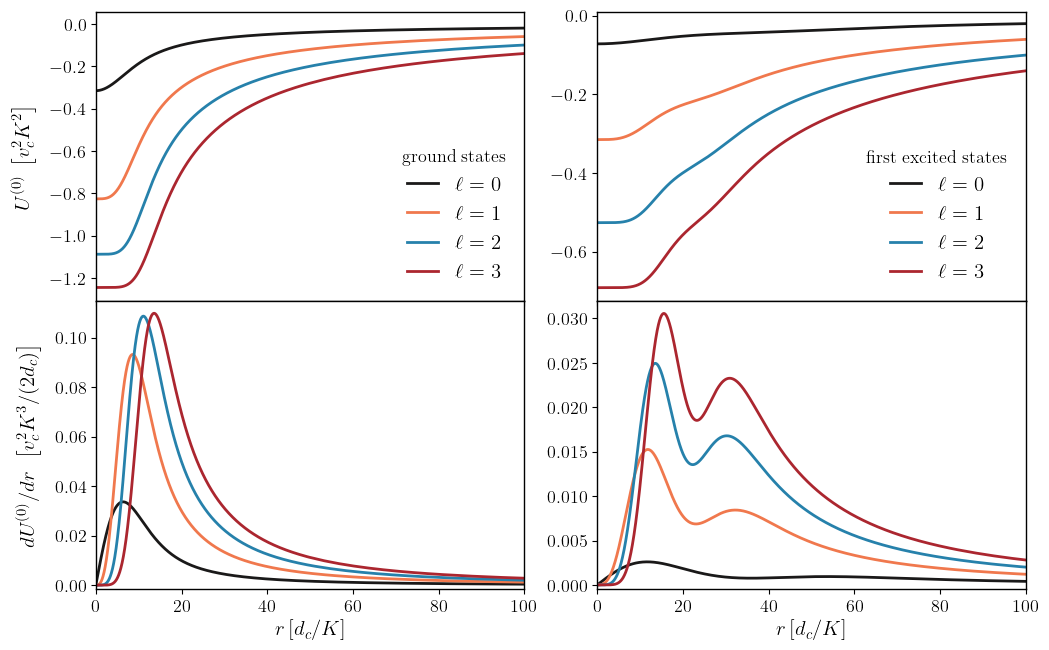

In [16]:
# datos
l0N1, l1N1, l2N1, l3N1 = datU[0], datU[4], datU[8], datU[12]
dl0N1, dl1N1, dl2N1, dl3N1 = datdU[0], datdU[4], datdU[8], datdU[12]
El0N1, El1N1, El2N1, El3N1 = datEnd[0], datEnd[4], datEnd[8], datEnd[12]
Lal0N1, Lal1N1, Lal2N1, Lal3N1 = datNod[0][1], datNod[4][1], datNod[8][1], datNod[12][1]
datN1 = [l0N1, l1N1, l2N1, l3N1]
datdN1 = [dl0N1, dl1N1, dl2N1, dl3N1]
datEN1 = [El0N1, El1N1, El2N1, El3N1]
datLaN1 = [Lal0N1, Lal1N1, Lal2N1, Lal3N1]

l0N2, l1N2, l2N2, l3N2 = datU[1], datU[5], datU[9], datU[13]
dl0N2, dl1N2, dl2N2, dl3N2 = datdU[1], datdU[5], datdU[9], datdU[13]
El0N2, El1N2, El2N2, El3N2 = datEnd[1], datEnd[5], datEnd[9], datEnd[13]
Lal0N2, Lal1N2, Lal2N2, Lal3N2 = datNod[1][1], datNod[5][1], datNod[9][1], datNod[13][1]
datN2 = [l0N2, l1N2, l2N2, l3N2]
datdN2 = [dl0N2, dl1N2, dl2N2, dl3N2]
datEN2 = [El0N2, El1N2, El2N2, El3N2]
datLaN2 = [Lal0N2, Lal1N2, Lal2N2, Lal3N2]

col = ['#1a1919', '#f0784d', '#2681ab', '#ab262f']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 7.5),
                       sharex=True, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.17) # espacio vertical y horizontal entre los subplots
                      ) 

for i in range(4):
    r, u, ell, E, Lam = datN1[i][0], datN1[i][1], datEN1[i][0], datEN1[i][2], datLaN1[i]
    
    ax[0][0].plot(r/Lam, E-(2*u)*Lam**2, ls='-', c=col[i], label=r'$\ell=%2d$'%ell) 
    # notar que ya multipliqué la energia antes por 2
    
# ax[0][0].hlines(y=0, xmin=0, xmax=200, color='#a6a2a2', ls=':')

ax[0][0].set_xlim(0, 100)
#ax[0][0].set_ylim(-1.3, 0.01)
ax[0][0].legend(frameon=False, title=r'ground states')
# ax[0][0].set_xlabel(r'$r\,[c_4]$')
ax[0][0].set_ylabel(r'$U^{(0)} \;\left[v_c^2 K^2\right]$', labelpad=10)

print('$\ell=1$')

for i in range(4):
    r, du, ell, E, Lam = datdN1[i][0], datdN1[i][1], datEN1[i][0], datEN1[i][2], datLaN1[i]
    
    ax[1][0].plot(r/Lam, -(4*du)*Lam**3, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)
    
ax[1][0].set_xlim(0, 100)
ax[1][0].set_ylim(-1.7e-03, 0.115)
# ax[1][0].legend(frameon=False, title=r'first-nodes with')
#ax[1].set_xscale('log')

ax[1][0].set_xlabel(r'$r\,[d_c/K]$')
ax[1][0].set_ylabel(r'$dU^{(0)}/dr \;\,\left[v_c^2 K^3/(2d_c)\right]$', labelpad=10)
#ax[1][0].set_ylabel(r'$dU^{(0)}/dr \;\,[\mu^7 G^3 K^3 \hbar^{-4}]$', labelpad=12)

#ax[1].text(x=60, y=0.003, s=r'first-nodes')


for i in range(4):
    r, u, ell, E, Lam = datN2[i][0], datN2[i][1], datEN2[i][0], datEN2[i][2], datLaN2[i]
    
    ax[0][1].plot(r/Lam, (-2*u)*Lam**2+E, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)
    
# ax[0][1].hlines(y=0, xmin=0, xmax=200, color='#a6a2a2', ls=':')

ax[0][1].set_xlim(0, 100)
ax[0][1].set_ylim(-0.725, 0.01)
ax[0][1].legend(frameon=False, title=r'first excited states')
# ax[0][1].set_xlabel(r'$r\,[c_4]$')
# ax[0][1].set_ylabel(r'$U_0 \;[\mu^5 G^2 \hbar^{-2}]$', labelpad=10)

for i in range(4):
    r, du, ell, E, Lam = datdN2[i][0], datdN2[i][1], datEN2[i][0], datEN2[i][2], datLaN2[i]
    
    ax[1][1].plot(r/Lam, -(4*du)*Lam**3, ls='-', c=col[i], label=r'$\ell=%2d$'%ell)
    
ax[1][1].set_xlim(0, 100)
ax[1][1].set_ylim(-0.5e-03, 0.032)
# ax[1][1].legend(frameon=False, title=r'first-nodes with')
#ax[1].set_xscale('log')

# ax[1][1].set_xlabel(r'$r\,[c_4]$')
# ax[1][1].set_ylabel(r'$U_0^{\prime} \;[\mu^8 G^3 \hbar^{-4}]$', labelpad=10)
ax[1][1].set_xlabel(r'$r\,[d_c/K]$')


In [17]:
fig.savefig('Up.eps', format='eps', #metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )

(0.0, 100.0)

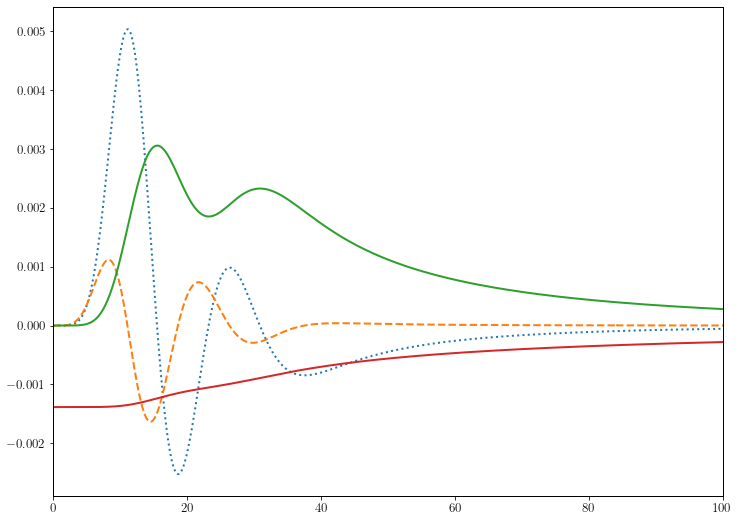

In [59]:
y = -(4*du)*Lam**3
x = r/Lam
dydx = np.diff(y)/np.diff(x)
ddydx = np.diff(dydx)/np.diff(x[:-1])

plt.plot(x[:-1], dydx, ':', label='approx')
plt.plot(x[:-2], ddydx, '--', label='approx')
plt.plot(r/Lam, -(4*du)*Lam**3/10)
plt.plot(r/Lam, ((-2*u)*Lam**2+E)/500)
plt.xlim(0,100)